# Modelo

In [1]:
# Cargamos las librerias
import pandas as pd

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Declaramos la ruta de los datos
path = 'latam-covid19-analysis\\data\\'

In [ ]:
# Cargamos los datos
mexico_2022 = pd.read_csv(path + 'mexico\\covid_2022.csv')

In [4]:
# Cambiamos el formato del nombre de las
# columnas de los datasets
mexico_2022.columns = mexico_2022.columns.str.lower()

In [5]:
# Mostamos los primeros registros
mexico_2022.head()

,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,tipo_paciente,...,otro_caso,toma_muestra_lab,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante,pais_nacionalidad,pais_origen,uci
0,2023-06-01,15ec76,1,12,5,2,5,5,35,1,...,2,2,97,1,1,3,99,México,97,97
1,2023-06-01,1ce5c6,2,6,9,2,9,9,10,2,...,2,2,97,1,2,7,99,México,97,2
2,2023-06-01,07e45f,1,6,12,1,12,12,29,1,...,2,2,97,2,97,6,99,México,97,97
3,2023-06-01,17d402,2,12,9,2,9,9,8,1,...,2,2,97,1,2,7,99,México,97,97
4,2023-06-01,0a392b,1,12,7,1,7,7,19,1,...,2,2,97,2,97,6,99,México,97,97


In [7]:
# Seleccionamos las columnas que no son necesarias
unless_columns = [
    'fecha_actualizacion',
    'id_registro',
    'origen',
    'sector',
    'entidad_um',
    'entidad_nac',
    'entidad_res',
    'municipio_res',
    'tipo_paciente',
    'fecha_ingreso',
    'fecha_sintomas',
    'fecha_def',
    'intubado',
    'nacionalidad',
    'embarazo',
    'habla_lengua_indig',
    'indigena',
    'otro_caso',
    'toma_muestra_lab',
    'resultado_lab',
    'toma_muestra_antigeno',
    'resultado_antigeno',
    'clasificacion_final',
    'migrante',
    'pais_nacionalidad',
    'pais_origen',
]

In [9]:
# Eliminamos las columnas
df = mexico_2022.drop(columns = unless_columns)

In [10]:
# Verificamos la cantidad de datos
# de cada columna
for col in df.columns:
    if col != 'edad':
        print(df[col].value_counts())
        print()

sexo
1    3656263
2    2795681
Name: count, dtype: int64

neumonia
2     6275225
1      110081
99      66638
Name: count, dtype: int64

diabetes
2     6042903
1      383239
98      25802
Name: count, dtype: int64

epoc
2     6392145
1       34629
98      25170
Name: count, dtype: int64

asma
2     6307669
1      119244
98      25031
Name: count, dtype: int64

inmusupr
2     6393702
1       33163
98      25079
Name: count, dtype: int64

hipertension
2     5886308
1      540583
98      25053
Name: count, dtype: int64

otra_com
2     6280172
98     102006
1       69766
Name: count, dtype: int64

cardiovascular
2     6374010
1       52850
98      25084
Name: count, dtype: int64

obesidad
2     6051617
1      376244
98      24083
Name: count, dtype: int64

renal_cronica
2     6379171
1       47720
98      25053
Name: count, dtype: int64

tabaquismo
2     6156857
1      269841
98      25246
Name: count, dtype: int64

uci
97    6188358
2      251952
1       10312
99       1322
Name: count, dt

In [11]:
# Eliminamos los registros de la columna uci
# que tengan los valores de 97, 98 y 99
df = df.drop(df[df['uci'].isin([97, 98, 99])].index)


In [13]:
# Dividimos los datos en los atributos 
# y la variable a predecir
X = df.drop(columns = 'uci')
y = df['uci']

In [14]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [15]:
# Creamos el modelo
model = DecisionTreeClassifier(random_state = 8)

In [16]:
# Entrenamos el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

In [17]:
# Evaluamos el modelo
model.score(X_test, y_test)

0.9526814481535851

In [18]:
# Obtenemos la matriz de confusión
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred); cm

array([[   54,  2006],
       [  476, 49917]], dtype=int64)

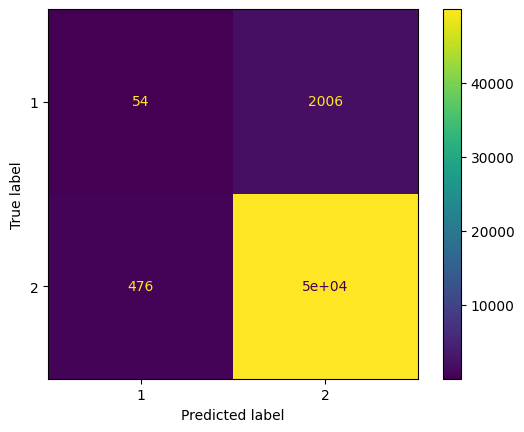

In [19]:
# Obtenemos la matriz de confusión
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [20]:
# Obtenemos el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.10      0.03      0.04      2060
           2       0.96      0.99      0.98     50393

    accuracy                           0.95     52453
   macro avg       0.53      0.51      0.51     52453
weighted avg       0.93      0.95      0.94     52453

